In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import splinelib as tsp

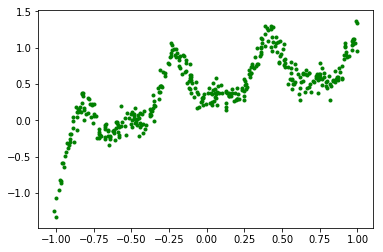

In [2]:
x = np.linspace(0,2,400)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 1 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)/1.5
yy = y.reshape(-1,1)
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')

In [6]:
max_points = 2
lr=0.1
spline1 = tsp.Spline1D(max_points, x, x)
spline2 = tsp.Spline1D(max_points, x, y)
max_points = 7
spline1.n_max = max_points
spline2.n_max = max_points

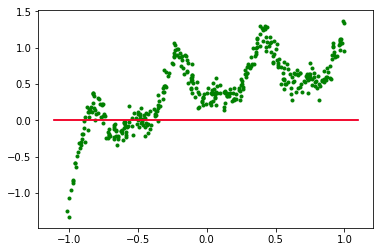

In [7]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline1.X, spline1.Y, color='m')
plt.plot(spline2.X, spline2.Y, color='r')

_______________________
Steps 0
Error 0.36175319935367667


_______________________
Steps 100
Error 0.16347356264896942


_______________________
Steps 200
Error 0.09007153208294999


_______________________
Steps 300
Error 0.08775477512534657


_______________________
Steps 400
Error 0.08775396507902662


_______________________
Steps 500
Error 0.08775396490340143


_______________________
Steps 600
Error 0.0877539649033637


_______________________
Steps 700
Error 0.0877539649033637


_______________________
Steps 800
Error 0.0877539649033637


_______________________
Steps 900
Error 0.0877539649033637


_______________________
Steps 1000
Error 0.0877539649033637


_______________________
Steps 1100
Error 0.07477788718734811


_______________________
Steps 1200
Error 0.07426613953600616


_______________________
Steps 1300
Error 0.0740615914083704


_______________________
Steps 1400
Error 0.0739064460390827


_______________________
Steps 1500
Error 0.07378150114324111


___________

TclError: invalid command name "pyimage35"

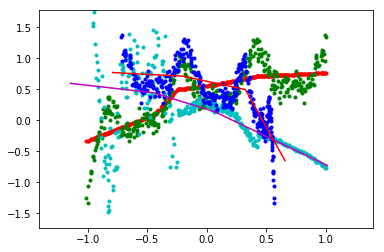

In [8]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1 = spline1.forward(x)
    a2 = spline2.forward(a1)
    da2 = a2 - y
    
    da1 = spline2.backward(da2)
    dx = spline1.backward(da1)
    
    spline1.update(lr)
    spline2.update(lr)
    
    if step % 1000 == 0:
        splines = [spline1, spline2]
        for spline in splines:
            spline._combine_linear_points_()
            spline._remove_close_points_()
            spline._remove_no_input_points_()
            spline._add_new_point_()
        
    if step % 100 == 0:
            
        error = (da2**2).mean()
        
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        
        ax.clear()
        epsilon=0.4
        plt.xlim(x.min()-epsilon, x.max()+epsilon)
        plt.ylim(y.min()-epsilon, y.max()+epsilon)
        
        a1 = spline1.forward(x)
        a2 = spline2.forward(a1)
        plt.scatter(x, a2, marker='.', color='r')

        plt.scatter(x, y, marker='.', color='g')
#         plt.scatter(x, a1-da1, marker='.', color='c')
#         plt.scatter(a1, a2-da2, marker='.', color='b')
        plt.scatter(x, a1-da1, marker='.', color='c')
        plt.scatter(a1, a2-da2, marker='.', color='b') #y = a2 - da2

        plt.plot(spline1.X, spline1.Y, color='m')
        plt.plot(spline2.X, spline2.Y, color='r')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a2, marker='.', color='r')

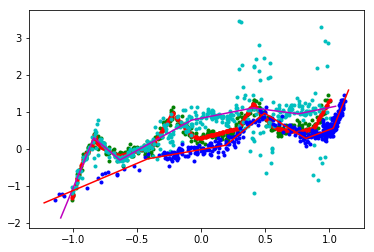

In [46]:
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a2, marker='.', color='r')

plt.scatter(x, a1-da1, marker='.', color='c')
plt.plot(spline1.X, spline1.Y, color='m')

plt.scatter(a1, a2-da2, marker='.', color='b')
plt.plot(spline2.X, spline2.Y, color='r')

## On neural network

In [52]:
%matplotlib tk
n = 15
optimizer=tnn.Adam(learning_rate=0.003)
l1 = tnn.NonLinearLayer(1,n,tnn.Relu(), optimizer=optimizer)
l2 = tnn.LinearLayer(n,1,optimizer=optimizer)
l3 = tnn.NonLinearLayer(1,n,tnn.Relu(),optimizer=optimizer)
l4 = tnn.LinearLayer(n,1,optimizer=optimizer)
network = tnn.AutoForm()
network.collect_global_layers()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    out = network.forward(xx)
    dy = out - yy
    
    dx = network.backward(dy)
    network.update()
    
    if step % 100 == 0:
            
        error = (dy**2).mean()
        
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        
        ax.clear()
        
        plt.scatter(x, y, marker='.', color='g')
        plt.scatter(x, out, marker='.', color='r')
        
#         y1 = l2.zee.reshape(-1)
#         y2 = l4.zee.reshape(-1)
#         y1_ = (l2.zee - l2.del_zee).reshape(-1)
#         y2_ = (l4.zee - l4.del_zee).reshape(-1)
#         plt.scatter(x, y1, marker='.', color='c')
#         plt.scatter(x, y1_, marker='.', color='m')
#         plt.scatter(y1, y2, marker='.', color='b')
#         plt.scatter(y1, y2_, marker='.', color='r')

        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
Steps 0
Error 1.0024338661824328


_______________________
Steps 100
Error 0.07922516273587311


_______________________
Steps 200
Error 0.07001586271161413


_______________________
Steps 300
Error 0.064898497440673


_______________________
Steps 400
Error 0.06251640563083562


_______________________
Steps 500
Error 0.06091047313955675


_______________________
Steps 600
Error 0.05950292993818236


_______________________
Steps 700
Error 0.058354865507154685


_______________________
Steps 800
Error 0.05731904820059919


_______________________
Steps 900
Error 0.05639262971772047


_______________________
Steps 1000
Error 0.05571946348145405


_______________________
Steps 1100
Error 0.05485355740712979


_______________________
Steps 1200
Error 0.054211650503101894


_______________________
Steps 1300
Error 0.05377337538818939


_______________________
Steps 1400
Error 0.05315286304897933


_______________________
Steps 1500
Error 0.05183865645930404


_____



_______________________
Steps 13000
Error 0.03860345839826274


_______________________
Steps 13100
Error 0.03861705651761974


_______________________
Steps 13200
Error 0.038600413563089735


_______________________
Steps 13300
Error 0.03862555343664906


_______________________
Steps 13400
Error 0.03859356489737255


_______________________
Steps 13500
Error 0.03862406942864462


_______________________
Steps 13600
Error 0.03859905728356442


_______________________
Steps 13700
Error 0.03859636096136329


_______________________
Steps 13800
Error 0.03859504472665053


_______________________
Steps 13900
Error 0.03860853540667869


_______________________
Steps 14000
Error 0.038591610605949664


_______________________
Steps 14100
Error 0.0386107105385214


_______________________
Steps 14200
Error 0.03860663966119294


_______________________
Steps 14300
Error 0.038591487397614865


_______________________
Steps 14400
Error 0.03860960240447097


_______________________
Steps 14500


TclError: invalid command name "pyimage483"

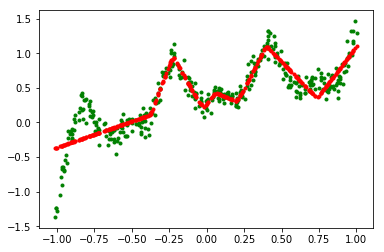

In [54]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, out, marker='.', color='r')